(500, 2)
(500,)


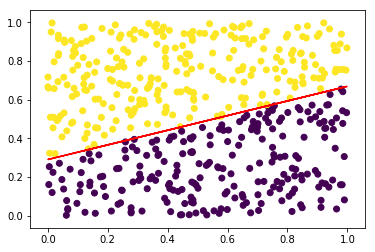

In [62]:
import numpy as np
N = 500
xn = np.asarray(np.random.rand(N, 2), np.float)
a = np.random.rand()
b = np.random.rand()
f = lambda x: a*x+b
yn = np.zeros(N)
for i in range(N):
    if xn[i,1] > f(xn[i,0]):
        yn[i] = 1
fxn = [f(x) for x in xn[:,0]]
print(xn.shape)
print(yn.shape)
import matplotlib.pyplot as plt
x, y = np.transpose(xn)
c = yn
plt.scatter(x, y, c=c)
plt.plot(xn[:,0], fxn, 'r-')

In [83]:
from keras.models import Sequential
from keras.layers import Dense
x_train = xn
y_train = yn
model = Sequential()
model.add(Dense(64, input_shape=(2,), activation='relu', name='layer0'))
model.add(Dense(16, activation='relu', name='layer2'))
model.add(Dense(1, activation='sigmoid', name='layer1'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=32
          )

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer0 (Dense)               (None, 64)                192       
_________________________________________________________________
layer2 (Dense)               (None, 16)                1040      
_________________________________________________________________
layer1 (Dense)               (None, 1)                 17        
Total params: 1,249
Trainable params: 1,249
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
500/500 [==============================] - 0s 636us/step - loss: 0.6454 - accuracy: 0.5660
Epoch 2/100
500/500 [==============================] - 0s 191us/step - loss: 0.6080 - accuracy: 0.6720
Epoch 3/100
500/500 [==============================] - 0s 200us/step - loss: 0.5799 - accuracy: 0.7260
Epoch 4/100
500/500 [==============================] - 0s 210us/step - l

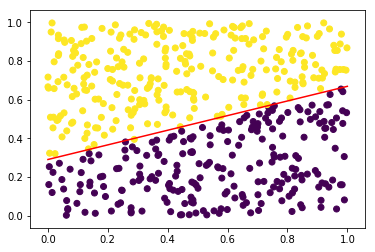

In [84]:
xn2 = np.asarray(np.random.rand(N, 2), np.float)
x2, y2 = np.transpose(xn)
pred = model.predict(xn)
pred = pred.reshape(-1)
c = np.zeros(N,)
for i in range(N):
    if pred[i] > 0.5:
        c[i] = 1
plt.scatter(x2, y2, c=c)
xl = np.linspace(0, 1, 500)
fl = [f(x) for x in xl]
plt.plot(xl, fl, 'r-')


In [78]:
layer_weight = model.get_layer('layer1').get_weights()
print(layer_weight[1].shape)


(16,)
